### Notebook to prepare the full dataset used for training of different models, combining different code throughout this repo


In [4]:
# Importing Libraries

import pandas as pd
import healpy as hp
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Defining important metrics and functions

# Setting NSIDE values
NSIDE = 512
NPIX = hp.nside2npix(NSIDE)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2resol(NSIDE, arcmin=True) / 60
    )
)
print(
    "Approximate resolution at NSIDE {} is {:.2} deg".format(
        NSIDE, hp.nside2pixarea(NSIDE, degrees=True)))


def raDec2thetaPhi(ra, dec):
    return (0.5 * np.pi - np.deg2rad(dec)), (np.deg2rad(ra))

Approximate resolution at NSIDE 512 is 0.11 deg
Approximate resolution at NSIDE 512 is 0.013 deg


# South

In [6]:
df_south = pd.read_csv('../../bricks_data/galaxy_catalogue_south.csv',
                       dtype={'LRG': 'int8', 'ELG': 'int8', 'QSO': 'int8', 'GLBG':'int8','RLBG':'int8'})


In [7]:
df_south = df_south.drop_duplicates()

In [8]:
print(df_south.isna().sum())

RA      0
DEC     0
LRG     0
ELG     0
QSO     0
GLBG    0
RLBG    0
dtype: int64


In [9]:
# Removing all Lines with Nan that were added to ensure that all bricks are stored
df_south = df_south.dropna(axis=0, inplace=False, how='any')
print(len(df_south))

AttributeError: 'DataFrame' object has no attribute 'BrickID'

In [11]:
print(len(df_south))

84497085


### Removing the Large Magellanic Cloud at Area
Large Magellanic Cloud (Ra 52:100 and DEC -70 to -50 respectively)

In [12]:
df_magellanic = df_south[(df_south['RA'] <=100) & (df_south['RA'] >=52) & (df_south['DEC'] <= -50) & (df_south['DEC'] >= -70)]

len(df_magellanic)

2727957

### 2. Get Galaxy Count per Healpy Pixel

In [13]:
# Magellanic
ra_magellanic = df_magellanic["RA"].to_numpy(copy=True)
dec_magellanic = df_magellanic["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_magellanic, dec_magellanic)

print("Number of LRGs in Sample:", len(ra_magellanic))

magellanic_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(magellanic_pixel_indices, return_counts=True)

print(unique)

mean_magellanic = counts.mean()
print("Mean LRGs per Pixel:", mean_magellanic)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_magellanic = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_magellanic.pixel_id = df_magellanic.pixel_id.astype(int)
df_magellanic.head()




Number of LRGs in Sample: 2727957
[2777035 2777036 2777037 ... 3033079 3033080 3033081]
Mean LRGs per Pixel: 95.01104067985511


pixel_id  lrg
0   2777035    4
1   2777036   31
2   2777037   34
3   2777038   30
4   2777039   39

In [14]:
# LRG

df_LRG = df_south[df_south["LRG"] == 1]
ra_LRG = df_LRG["RA"].to_numpy(copy=True)
dec_LRG = df_LRG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_LRG, dec_LRG)

print("Number of LRGs in Sample:", len(ra_LRG))

LRG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(LRG_pixel_indices, return_counts=True)
mean_LRG = counts.mean()
print("Mean LRGs per Pixel:", mean_LRG)
# Calculating Densities for every block

#density_LRG = (counts / mean_LRG) - 1
id_density = np.stack((unique, counts), axis=1)
#print(id_density)
df_lrg = pd.DataFrame(id_density, columns=['pixel_id', 'lrg'])
df_lrg.pixel_id = df_lrg.pixel_id.astype(int)

Number of LRGs in Sample: 9555538
Mean LRGs per Pixel: 8.480747435284135


In [15]:
# elg

df_ELG = df_south[df_south["ELG"] == 1]
ra_ELG = df_ELG["RA"].to_numpy(copy=True)
dec_ELG = df_ELG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_ELG, dec_ELG)

print("Number of ELGs in Sample:", len(ra_ELG))

ELG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(ELG_pixel_indices, return_counts=True)
mean_ELG = counts.mean()
print("Mean ELGs per Pixel:", mean_ELG)
# Calculating Densities for every block
#density_ELG = (counts / mean_ELG) - 1
id_density = np.stack((unique, counts), axis=1)
df_elg = pd.DataFrame(id_density, columns=['pixel_id', 'elg'])
df_elg.pixel_id = df_elg.pixel_id.astype(int)


Number of ELGs in Sample: 36438777
Mean ELGs per Pixel: 32.206831542188034


In [16]:
df_QSO = df_south[df_south["QSO"] == 1]
ra_QSO = df_QSO["RA"].to_numpy(copy=True)
dec_QSO = df_QSO["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_QSO, dec_QSO)

print("Number of QSOs in Sample:", len(ra_QSO))

QSO_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(QSO_pixel_indices, return_counts=True)
mean_QSO = counts.mean()
print("Mean QSOs per Pixel:", mean_QSO)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_qso = pd.DataFrame(id_density, columns=['pixel_id', 'qso'])
df_qso.pixel_id = df_qso.pixel_id.astype(int)

Number of QSOs in Sample: 4548589
Mean QSOs per Pixel: 4.152040105631457


In [17]:
df_GLBG = df_south[df_south["GLBG"] == 1]
ra_GLBG = df_GLBG["RA"].to_numpy(copy=True)
dec_GLBG = df_GLBG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_GLBG, dec_GLBG)

print("Number of GLBGs in Sample:", len(ra_GLBG))

GLBG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(GLBG_pixel_indices, return_counts=True)
mean_GLBG = counts.mean()
print("Mean GLBGs per Pixel:", mean_GLBG)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_glbg = pd.DataFrame(id_density, columns=['pixel_id', 'glbg'])
df_glbg.pixel_id = df_glbg.pixel_id.astype(int)

Number of GLBGs in Sample: 27904595
Mean GLBGs per Pixel: 24.67570497668574


In [18]:
df_RLBG = df_south[df_south["RLBG"] == 1]
ra_RLBG = df_RLBG["RA"].to_numpy(copy=True)
dec_RLBG = df_RLBG["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_RLBG, dec_RLBG)

print("Number of RLBGs in Sample:", len(ra_RLBG))

RLBG_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(RLBG_pixel_indices, return_counts=True)
mean_RLBG = counts.mean()
print("Mean RLBGs per Pixel:", mean_RLBG)
# Calculating Densities for every block
#density_QSO = (counts / mean_QSO) - 1
id_density = np.stack((unique, counts), axis=1)
df_rlbg = pd.DataFrame(id_density, columns=['pixel_id', 'rlbg'])
df_rlbg.pixel_id = df_rlbg.pixel_id.astype(int)

Number of RLBGs in Sample: 7965144
Mean RLBGs per Pixel: 7.188427247482291


In [19]:
df_south = pd.merge(df_lrg, df_elg, how='outer', on='pixel_id')
df_south = pd.merge(df_south, df_qso, how='outer', on='pixel_id')
df_south = pd.merge(df_south, df_glbg, how='outer', on='pixel_id')
df_south = pd.merge(df_south, df_rlbg, how='outer', on='pixel_id')

print(len(df_south))

1132194


In [20]:
# Filling all pixels where I do not have counts for all 3 types of galaxies
df_south.fillna(value=0, inplace=True)
print(df_south.isna().sum())
print(df_south.shape)

pixel_id    0
lrg         0
elg         0
qso         0
glbg        0
rlbg        0
dtype: int64
(1132194, 6)


In [21]:
# Removing the Magellanic Cloud
print(len(df_south))
intersection = pd.Series(list(set(df_south.pixel_id) & set(df_magellanic.pixel_id)))
print(len(intersection))
df_south = df_south[~(df_south['pixel_id'].isin(intersection))]
print(len(df_south))

1132194
28712
1103482


### 3. Plotting Galaxy Densities

0.0 180.0 -180.0 180.0


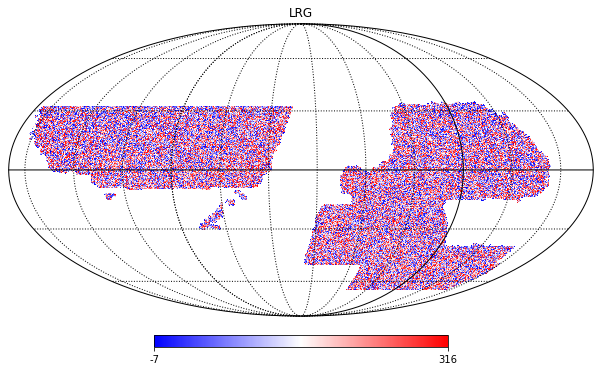

In [22]:
m_LRG = np.zeros(NPIX)

m_LRG[df_south.pixel_id.to_numpy()] = df_south.lrg.to_numpy()
mask = (m_LRG == 0)
m_LRG[mask] = np.nan
hp.mollview(m_LRG, title="LRG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


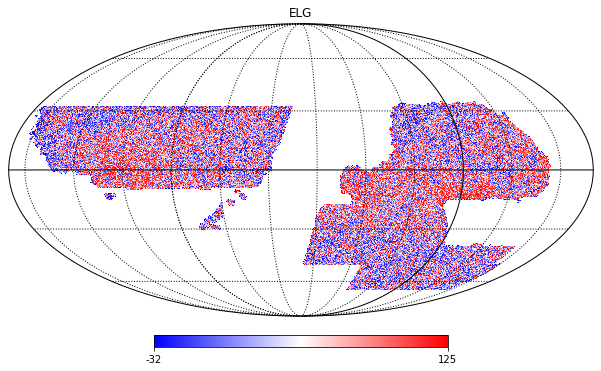

In [23]:
m_ELG = np.zeros(NPIX)

m_ELG[df_south.pixel_id.to_numpy()] = df_south.elg.to_numpy()
mask = (m_ELG == 0)
m_ELG[mask] = np.nan
hp.mollview(m_ELG, title="ELG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


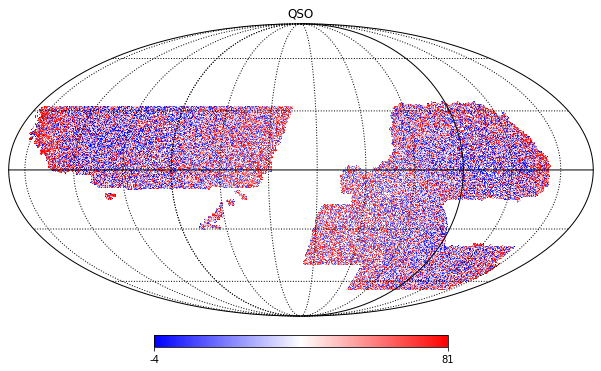

In [24]:
m_QSO = np.zeros(NPIX)

m_QSO[df_south.pixel_id.to_numpy()] = df_south.qso.to_numpy()
mask = (m_QSO == 0)
m_QSO[mask] = np.nan
hp.mollview(m_QSO, title="QSO", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


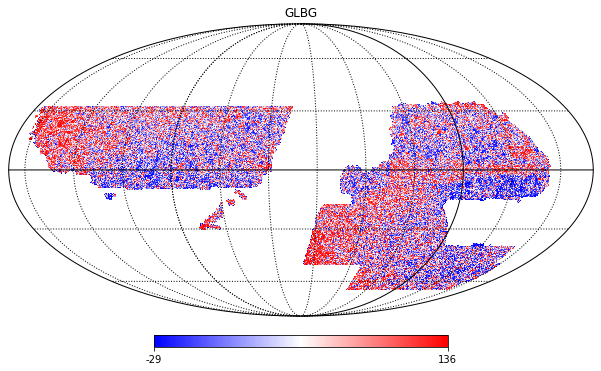

In [25]:
m_GLBG = np.zeros(NPIX)

m_GLBG[df_south.pixel_id.to_numpy()] = df_south.glbg.to_numpy()
mask = (m_GLBG == 0)
m_GLBG[mask] = np.nan
hp.mollview(m_GLBG, title="GLBG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

0.0 180.0 -180.0 180.0


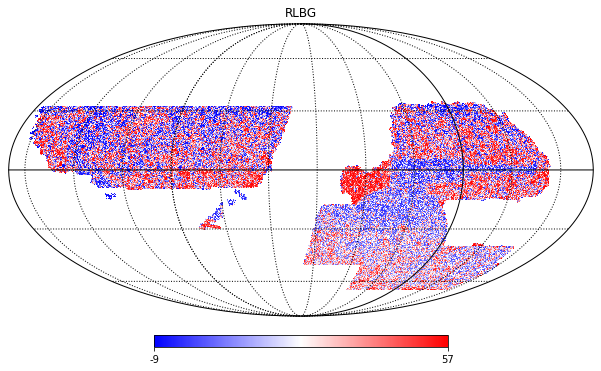

In [26]:
m_RLBG = np.zeros(NPIX)

m_RLBG[df_south.pixel_id.to_numpy()] = df_south.rlbg.to_numpy()
mask = (m_RLBG == 0)
m_RLBG[mask] = np.nan
hp.mollview(m_RLBG, title="RLBG", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [27]:
# Getting Exposure Densities across pixels

with open(f'../../bricks_data/pixel2ccd_{NSIDE}_non_inclusive.pickle', 'rb') as f:
    pixel2ccd_dict_non_incl = pickle.load(f)
    f.close()


In [28]:
df_south = df_south.astype(int)
df_south.head()



pixel_id  lrg  elg  qso  glbg  rlbg
0    670729    4   10    4     6     4
1    670730   17   18   15    31    12
2    670731    4    9    3     9     2
3    670732    1   15    4    14     6
4    670733    5   23    3     9     5

In [29]:
pix_ids = df_south.pixel_id.to_numpy()
exp_len = np.zeros(len(pix_ids))
for i, pix in enumerate(pix_ids):
    exp_len[i] = len(pixel2ccd_dict_non_incl[pix])
df_south['exposures'] = exp_len

In [30]:
df_south = df_south.astype(int)

print(len(df_south[df_south.exposures < 7]))

95298


0.0 180.0 -180.0 180.0


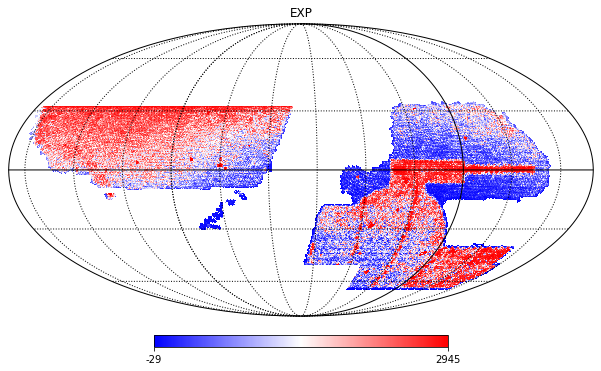

In [31]:
m_EXP = np.zeros(NPIX)

m_EXP[df_south.pixel_id.to_numpy()] = df_south.exposures.to_numpy()
mask = (m_EXP == 0)
m_EXP[mask] = np.nan
hp.mollview(m_EXP, title="EXP", format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()



### 4. Importing the Systematics Values and Appending them to the df.


#### a. Stellar Density

In [32]:
# Import New Systematics here --> maps by Boris
m_hinh = hp.read_map("../../bricks_data/systematics_maps/HINH_512_NEST.fits")
m_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")
m_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")
m_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")

m_hinh = hp.reorder(map_in=m_hinh, n2r=True)
m_gaia = hp.reorder(map_in=m_gaia, n2r=True)
m_gaia12 = hp.reorder(map_in=m_gaia12, n2r=True)
m_sagitarius = hp.reorder(map_in=m_sagitarius, n2r=True)

unique = np.arange(NPIX)

id_density = np.stack((unique, m_hinh, m_gaia, m_gaia12, m_sagitarius,), axis=1)

df_hinh = pd.DataFrame(id_density, columns=['pixel_id', 'hinh','gaia', 'gaia12', 'sagitarius'])
df_hinh.pixel_id = df_hinh.pixel_id.astype(int)

df_south = pd.merge(df_south, df_hinh, how='inner', on='pixel_id')

In [33]:

#Plot all stellar maps across the full sky
"""m_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")
mask = (m_gaia == 0)
m_gaia[mask] = np.nan
hp.mollview(m_gaia, title="gaia", format='%i', nest=True, norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")

mask = (m_sagitarius == 0)
m_sagitarius[mask] = np.nan
hp.mollview(m_sagitarius, title="sagitarius", nest=True, format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")
mask = (m_gaia12 == 0)
m_gaia12[mask] = np.nan
hp.mollview(m_gaia12, title="gaia12lt", format='%i', nest=True, norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

m_hinh = hp.read_map("../../bricks_data/systematics_maps/HINH_512_NEST.fits")

mask = (m_hinh == 0)
m_hinh[mask] = np.nan
hp.mollview(m_hinh, title="hinh", nest=True, format='%i', norm='hist', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()"""

'm_gaia = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_Gmag_gt17_512_NEST.fits")\nmask = (m_gaia == 0)\nm_gaia[mask] = np.nan\nhp.mollview(m_gaia, title="gaia", format=\'%i\', nest=True, norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'white\',\n            remove_dip=True, remove_mono=True)\nhp.graticule()\n\nm_sagitarius = hp.read_map("../../bricks_data/systematics_maps/SagitariusDR2_512_NEST.fits")\n\nmask = (m_sagitarius == 0)\nm_sagitarius[mask] = np.nan\nhp.mollview(m_sagitarius, title="sagitarius", nest=True, format=\'%i\', norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'white\',\n            remove_dip=True, remove_mono=True)\nhp.graticule()\n\nm_gaia12 = hp.read_map("../../bricks_data/systematics_maps/GaiaEDR3_12lt_Gmag_gt17_512_NEST.fits")\nmask = (m_gaia12 == 0)\nm_gaia12[mask] = np.nan\nhp.mollview(m_gaia12, title="gaia12lt", format=\'%i\', nest=True, norm=\'hist\', cmap="bwr", notext=False, rot=(100, 0, 0), badcolor=\'wh

In [34]:
df_stellar = pd.read_csv('../../bricks_data/stellar_catalogue_south.csv')


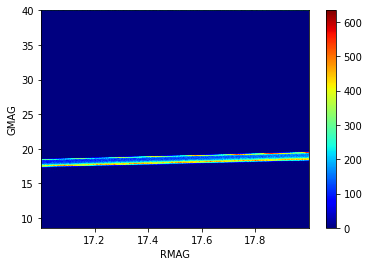

In [35]:
label_1 = 'RMAG'
label_2 = 'GMAG'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [36]:
# REMOVING OUTLIERS
print(df_stellar.shape)

(9603616, 5)


In [37]:
df_stellar['GMR'] = df_stellar['GMAG'] - df_stellar['RMAG']
df_stellar['RMZ'] = df_stellar['RMAG'] - df_stellar['ZMAG']

In [38]:
df_stellar = df_stellar[(df_stellar['GMAG'] > 15) & (df_stellar['GMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['ZMAG'] > 15) & (df_stellar['ZMAG'] < 30)]
df_stellar = df_stellar[(df_stellar['GMR'] > -2) & (df_stellar['GMR'] < 4)]
df_stellar = df_stellar[(df_stellar['RMZ'] > -2) & (df_stellar['RMZ'] < 4)]
print(df_stellar.shape)


(9349506, 7)


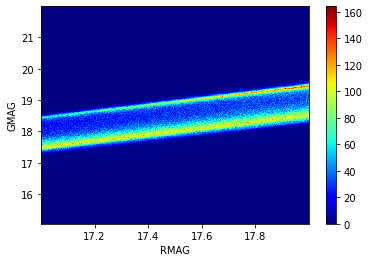

In [39]:
plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()


In [40]:
#Dividing RMAG Column into 1000 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_RMAG'] = pd.qcut(df_stellar['RMAG'], q=1000, labels=False)
df_stellar['percent_RMAG'].value_counts()


434    9382
506    9380
524    9377
593    9376
892    9374
       ... 
809    9324
594    9321
507    9320
435    9318
885    9313
Name: percent_RMAG, Length: 1000, dtype: int64

In [41]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMAG')
zscore = lambda x: abs((x - x.median()) / x.std())
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [42]:
#Dividing RMAG Column into 100 equally filled bins (assuming within the RMAG of 17-18 this is somewhat uniform)
df_stellar['percent_GMR'] = pd.qcut(df_stellar['GMR'], q=1000, labels=False)
df_stellar['percent_RMZ'] = pd.qcut(df_stellar['RMZ'], q=1000, labels=False)
df_stellar.shape

(9349506, 12)

In [43]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_GMR')
df_stellar['Z_SCORE_RMZ'] = grouped['RMZ'].transform(zscore)


In [44]:
#grouped = df.groupby('percent_RMAG', as_index=False).sem()
grouped = df_stellar.groupby('percent_RMZ')
df_stellar['Z_SCORE_GMR'] = grouped['GMR'].transform(zscore)

In [45]:
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_GMR'] < 3)]
print(df_stellar.shape)
df_stellar = df_stellar[(df_stellar['Z_SCORE_RMZ'] < 3)]
df_stellar.shape

(9349506, 12)
(9282180, 12)


(9245319, 12)

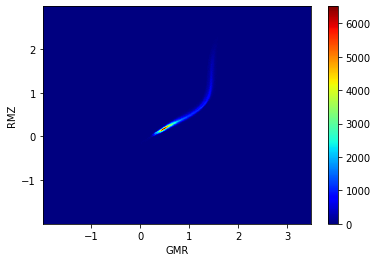

In [46]:
label_1 = 'GMR'
label_2 = 'RMZ'

plt.hist2d(df_stellar[label_1], df_stellar[label_2], bins=1000, cmap='jet')
plt.xlabel(label_1)
plt.ylabel(label_2)
plt.colorbar()
plt.show()

In [47]:
ra_stellar = df_stellar["RA"].to_numpy(copy=True)
dec_stellar = df_stellar["DEC"].to_numpy(copy=True)
theta, phi = raDec2thetaPhi(ra_stellar, dec_stellar)

print("Number of stellars in Sample:", len(ra_stellar))

stellar_pixel_indices = hp.ang2pix(NSIDE, theta, phi)

# Finding out unique indices and how often they appear --> shows the density of LRGs in this pixel
(unique, counts) = np.unique(stellar_pixel_indices, return_counts=True)

print(unique)

mean_stellar = counts.mean()
print("Mean stellars per Pixel:", mean_stellar)
# Calculating Densities for every block
density_stellar = (counts / mean_stellar) - 1
id_density = np.stack((unique, counts), axis=1)
print(id_density)
df_stellar = pd.DataFrame(id_density, columns=['pixel_id', 'stellar'])
df_stellar.pixel_id = df_stellar.pixel_id.astype(int)

print(df_stellar.head())

print(df_stellar.isna().sum())

Number of stellars in Sample: 9245319
[ 653722  653723  653724 ... 3033076 3033078 3033080]
Mean stellars per Pixel: 8.173654775123948
[[ 653722       3]
 [ 653723       5]
 [ 653724       6]
 ...
 [3033076       3]
 [3033078       1]
 [3033080       1]]
   pixel_id  stellar
0    653722        3
1    653723        5
2    653724        6
3    653725        2
4    653726        3
pixel_id    0
stellar     0
dtype: int64


In [48]:
df_south = df_south.merge(df_stellar, how='inner', on='pixel_id')
print(df_south.isna().sum())
df_south.shape

pixel_id      0
lrg           0
elg           0
qso           0
glbg          0
rlbg          0
exposures     0
hinh          0
gaia          0
gaia12        0
sagitarius    0
stellar       0
dtype: int64


(1085087, 12)

In [49]:
df_south.head()

pixel_id  lrg  elg  qso  glbg  rlbg  exposures          hinh    gaia  \
0    670729    4   10    4     6     4          3  6.411134e+20  1.5000   
1    670730   17   18   15    31    12          3  6.322374e+20  1.4375   
2    670731    4    9    3     9     2          3  6.046366e+20  1.4375   
3    670732    1   15    4    14     6          3  5.831720e+20  0.8750   
4    670733    5   23    3     9     5          3  5.593635e+20  0.8750   

   gaia12  sagitarius  stellar  
0  6.4375         0.0        4  
1  5.6250         0.0        5  
2  6.3125         0.0        3  
3  5.1875         0.0        8  
4  5.6875         0.0        6

0.0 180.0 -180.0 180.0


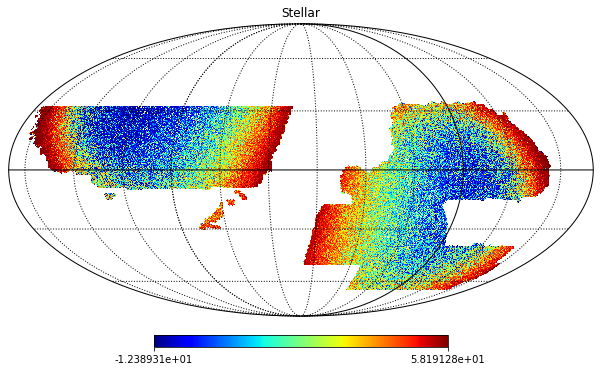

In [50]:
m_Stellar = np.zeros(NPIX)

m_Stellar[df_south.pixel_id.to_numpy()] = df_south.stellar.to_numpy()
mask = (m_Stellar == 0)
m_Stellar[mask] = np.nan
hp.mollview(m_Stellar, title="Stellar", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0),
            badcolor='white', remove_dip=True, remove_mono=True)
hp.graticule()

#### EBV Extraction

In [51]:
from astropy.coordinates import SkyCoord, Latitude, Longitude
from dustmaps.sfd import SFDQuery

In [52]:
from dustmaps.config import config

config['data_dir'] = '/Users/edgareggert/astrostatistics/data_preprocessing/.dustmapsrc'

In [53]:
## Getting the centers of each pixel in my corpus as RaDec

pixels_ids = df_south["pixel_id"].to_numpy()
subpixel_coords = hp.pix2ang(NSIDE, pixels_ids, lonlat=True)
ra_ebv = subpixel_coords[0]
dec_ebv = subpixel_coords[1]

In [54]:
#Querying their position on the SFD dustmap
sfd = SFDQuery()
coords = SkyCoord(ra_ebv, dec_ebv, frame='icrs', unit='deg')
ebv = sfd(coords)

df_south["EBV"] = ebv

In [55]:
df_south.EBV.describe()
df_south.head()


pixel_id  lrg  elg  qso  glbg  rlbg  exposures          hinh    gaia  \
0    670729    4   10    4     6     4          3  6.411134e+20  1.5000   
1    670730   17   18   15    31    12          3  6.322374e+20  1.4375   
2    670731    4    9    3     9     2          3  6.046366e+20  1.4375   
3    670732    1   15    4    14     6          3  5.831720e+20  0.8750   
4    670733    5   23    3     9     5          3  5.593635e+20  0.8750   

   gaia12  sagitarius  stellar       EBV  
0  6.4375         0.0        4  0.065876  
1  5.6250         0.0        5  0.062675  
2  6.3125         0.0        3  0.058580  
3  5.1875         0.0        8  0.056889  
4  5.6875         0.0        6  0.054664

0.0 180.0 -180.0 180.0


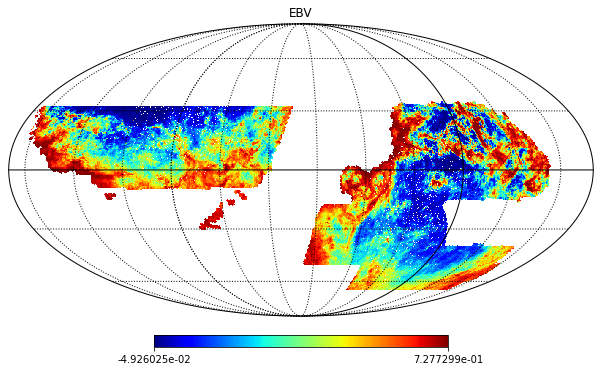

In [56]:
m_EBV = np.zeros(NPIX)

m_EBV[df_south.pixel_id.to_numpy()] = df_south.EBV.to_numpy()
mask = (m_EBV == 0)
m_EBV[mask] = np.nan
hp.mollview(m_EBV, title="EBV", format='%e', norm='hist', cmap="jet", notext=False, rot=(100, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True)
hp.graticule()

In [57]:
df_south.exposures = df_south.exposures.astype(int)
df_south.head()


pixel_id  lrg  elg  qso  glbg  rlbg  exposures          hinh    gaia  \
0    670729    4   10    4     6     4          3  6.411134e+20  1.5000   
1    670730   17   18   15    31    12          3  6.322374e+20  1.4375   
2    670731    4    9    3     9     2          3  6.046366e+20  1.4375   
3    670732    1   15    4    14     6          3  5.831720e+20  0.8750   
4    670733    5   23    3     9     5          3  5.593635e+20  0.8750   

   gaia12  sagitarius  stellar       EBV  
0  6.4375         0.0        4  0.065876  
1  5.6250         0.0        5  0.062675  
2  6.3125         0.0        3  0.058580  
3  5.1875         0.0        8  0.056889  
4  5.6875         0.0        6  0.054664

In [58]:
with open('../../bricks_data/pixel2systematics_geometric_512_2048_inclusive.pickle', 'rb') as f:
    geo_dict_inc = pickle.load(f)
    f.close()

print(len(geo_dict_inc.keys()))

1784270


In [59]:
sys_list = []
for key in geo_dict_inc.keys():
    ind_sys_list = geo_dict_inc[key]
    ind_sys_list.append(key)
    sys_list.append(ind_sys_list)

df_sys_geo_inc = pd.DataFrame(sys_list, columns=['airmass',
                                                'ccdskysb_g',
                                                'ccdskysb_r',
                                                'ccdskysb_z',
                                                'exptime_g',
                                                'exptime_r',
                                                'exptime_z',
                                                'meansky_g',
                                                'meansky_r',
                                                'meansky_z',
                                                'galdepth_g',
                                                'galdepth_r',
                                                'galdepth_z',
                                                'seeing_g',
                                                'seeing_r',
                                                'seeing_z',
                                                'psfdepth_g',
                                                'psfdepth_r',
                                                'psfdepth_z',
                                                'psfnorm_mean_g',
                                                'psfnorm_mean_r',
                                                'psfnorm_mean_z',
                                                'gausspsfdepth_g',
                                                'gausspsfdepth_r',
                                                'gausspsfdepth_z',
                                                'pixel_covered',
                                                'pixel_id'])



In [60]:
print(len((df_sys_geo_inc)))

1784270


In [61]:
df_south = df_south.merge(df_sys_geo_inc, how='inner', on='pixel_id')
print(len(df_south))

1082513


In [62]:
print(df_south.isna().sum())

pixel_id             0
lrg                  0
elg                  0
qso                  0
glbg                 0
rlbg                 0
exposures            0
hinh                 0
gaia                 0
gaia12               0
sagitarius           0
stellar              0
EBV                  0
airmass              0
ccdskysb_g          59
ccdskysb_r         108
ccdskysb_z          12
exptime_g            0
exptime_r            0
exptime_z            0
meansky_g            0
meansky_r            0
meansky_z            0
galdepth_g           0
galdepth_r           0
galdepth_z           0
seeing_g             0
seeing_r             0
seeing_z             0
psfdepth_g           0
psfdepth_r           0
psfdepth_z           0
psfnorm_mean_g       0
psfnorm_mean_r       0
psfnorm_mean_z       0
gausspsfdepth_g      0
gausspsfdepth_r      0
gausspsfdepth_z      0
pixel_covered        0
dtype: int64


In [63]:
df_south.dropna(axis=0, inplace=True)
print(df_south.isna().sum())

pixel_id           0
lrg                0
elg                0
qso                0
glbg               0
rlbg               0
exposures          0
hinh               0
gaia               0
gaia12             0
sagitarius         0
stellar            0
EBV                0
airmass            0
ccdskysb_g         0
ccdskysb_r         0
ccdskysb_z         0
exptime_g          0
exptime_r          0
exptime_z          0
meansky_g          0
meansky_r          0
meansky_z          0
galdepth_g         0
galdepth_r         0
galdepth_z         0
seeing_g           0
seeing_r           0
seeing_z           0
psfdepth_g         0
psfdepth_r         0
psfdepth_z         0
psfnorm_mean_g     0
psfnorm_mean_r     0
psfnorm_mean_z     0
gausspsfdepth_g    0
gausspsfdepth_r    0
gausspsfdepth_z    0
pixel_covered      0
dtype: int64


In [64]:
print(df_south.describe())

           pixel_id           lrg           elg           qso          glbg  \
count  1.082343e+06  1.082343e+06  1.082343e+06  1.082343e+06  1.082343e+06   
mean   1.656607e+06  8.469199e+00  3.215482e+01  3.911845e+00  2.434213e+01   
std    6.407487e+05  5.126484e+00  8.139860e+00  2.373641e+00  9.827870e+00   
min    6.707290e+05  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.131442e+06  5.000000e+00  2.700000e+01  2.000000e+00  1.700000e+01   
50%    1.541084e+06  8.000000e+00  3.200000e+01  4.000000e+00  2.300000e+01   
75%    2.127314e+06  1.100000e+01  3.700000e+01  5.000000e+00  3.000000e+01   
max    3.009980e+06  3.820000e+02  1.714000e+03  2.620000e+02  2.810000e+02   

               rlbg     exposures          hinh          gaia        gaia12  \
count  1.082343e+06  1.082343e+06  1.082343e+06  1.082343e+06  1.082343e+06   
mean   7.129533e+00  1.794831e+01  3.347166e+20  7.675465e-01  4.216382e+00   
std    4.616179e+00  4.834526e+01  1.779971e+20  5.

In [65]:
cols = list(df_south.columns)
cols.remove('pixel_id')


In [66]:
df_south.head()

pixel_id  lrg  elg  qso  glbg  rlbg  exposures          hinh    gaia  \
0    670729    4   10    4     6     4          3  6.411134e+20  1.5000   
1    670730   17   18   15    31    12          3  6.322374e+20  1.4375   
2    670731    4    9    3     9     2          3  6.046366e+20  1.4375   
3    670732    1   15    4    14     6          3  5.831720e+20  0.8750   
4    670733    5   23    3     9     5          3  5.593635e+20  0.8750   

   gaia12  ...  psfdepth_g  psfdepth_r  psfdepth_z  psfnorm_mean_g  \
0  6.4375  ...   24.001293   23.566471   22.641453        0.088764   
1  5.6250  ...   24.001293   23.566471   22.666687        0.088764   
2  6.3125  ...   24.001293   23.566471   22.666687        0.088764   
3  5.1875  ...   24.048332   23.623116   22.671457        0.089410   
4  5.6875  ...   24.048332   23.623116   22.657516        0.089410   

   psfnorm_mean_r  psfnorm_mean_z  gausspsfdepth_g  gausspsfdepth_r  \
0        0.109631        0.137593        24.020311        23.665588   
1        0.109631        0.138209        24.020311        23.665588   
2        0.109631        0.138209        24.020311        23.665588   
3        0.111164        0.138123        24.064425        23.719772   
4        0.111164        0.133112        24.064425        23.719772   

   gausspsfdepth_z  pixel_covered  
0        22.791218         0.3750  
1        22.818169         0.6250  
2        22.818169         0.6250  
3        22.825623         0.6250  
4        22.792101         0.5625  

[5 rows x 39 columns]

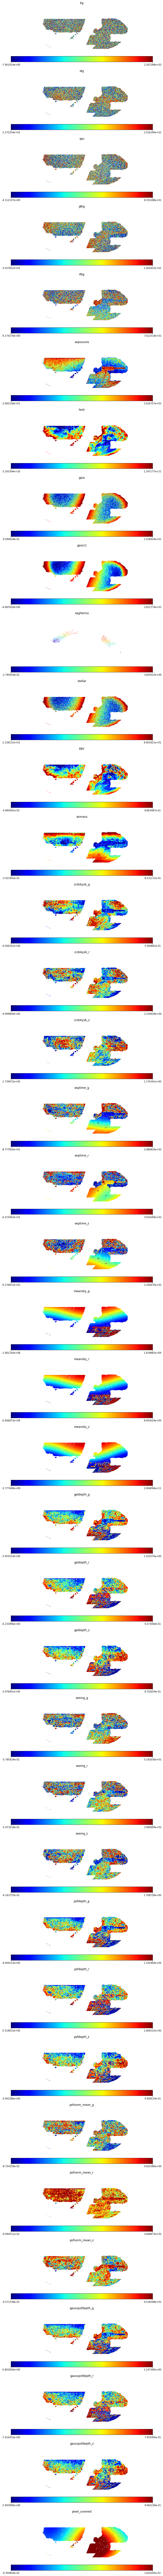

In [67]:
nrows = 38
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_south.pixel_id.to_numpy()] = df_south[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()



In [ ]:
df_south.describe()

In [ ]:


df_south.head()

## Working on splitting the dataset south into south + DES mirroring the Chaussidon paper

### Splitting on Exposures



In [68]:

df_south['RA'], df_south['DEC'] = hp.pix2ang(nside=NSIDE, ipix=df_south.pixel_id.to_numpy(), lonlat=True)

df_south.head()

pixel_id  lrg  elg  qso  glbg  rlbg  exposures          hinh    gaia  \
0    670729    4   10    4     6     4          3  6.411134e+20  1.5000   
1    670730   17   18   15    31    12          3  6.322374e+20  1.4375   
2    670731    4    9    3     9     2          3  6.046366e+20  1.4375   
3    670732    1   15    4    14     6          3  5.831720e+20  0.8750   
4    670733    5   23    3     9     5          3  5.593635e+20  0.8750   

   gaia12  ...  psfdepth_z  psfnorm_mean_g  psfnorm_mean_r  psfnorm_mean_z  \
0  6.4375  ...   22.641453        0.088764        0.109631        0.137593   
1  5.6250  ...   22.666687        0.088764        0.109631        0.138209   
2  6.3125  ...   22.666687        0.088764        0.109631        0.138209   
3  5.1875  ...   22.671457        0.089410        0.111164        0.138123   
4  5.6875  ...   22.657516        0.089410        0.111164        0.133112   

   gausspsfdepth_g  gausspsfdepth_r  gausspsfdepth_z  pixel_covered        RA  \
0        24.020311        23.665588        22.791218         0.3750  1.669922   
1        24.020311        23.665588        22.818169         0.6250  1.845703   
2        24.020311        23.665588        22.818169         0.6250  2.021484   
3        24.064425        23.719772        22.825623         0.6250  2.197266   
4        24.064425        23.719772        22.792101         0.5625  2.373047   

         DEC  
0  34.953865  
1  34.953865  
2  34.953865  
3  34.953865  
4  34.953865  

[5 rows x 41 columns]

In [69]:
df_des = df_south[(df_south.RA < 105) | (df_south.RA > 300)]
df_des = df_des[(df_des.DEC < 10)]

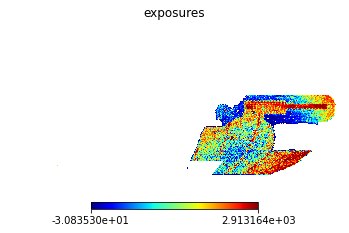

In [70]:
m = np.zeros(NPIX)

m[df_des.pixel_id.to_numpy()] = df_des['exposures'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures',format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)


In [71]:
cut = 120
df_des = df_des[df_des.exposures > cut]
df_des_low = df_des[df_des.exposures <= 300]
df_des_high = df_des[df_des.exposures > 300]

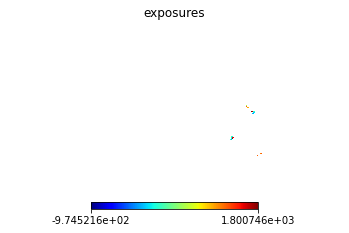

In [72]:
m = np.zeros(NPIX)

m[df_des.pixel_id.to_numpy()] = df_des['exposures'].to_numpy()
mask = (m == 0)
m[mask] = np.nan
hp.mollview(m, title='exposures',format='%e', norm='hist', cmap="jet", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)


In [73]:
print(len(df_south))
intersection = pd.Series(list(set(df_south.pixel_id) & set(df_des.pixel_id)))
print(len(intersection))
df_south_comp = df_south[~(df_south['pixel_id'].isin(intersection))]
print(len(df_south_comp))
#df_non_des = df_south[df_south.exposures <= cut]

1082343
1952
1080391


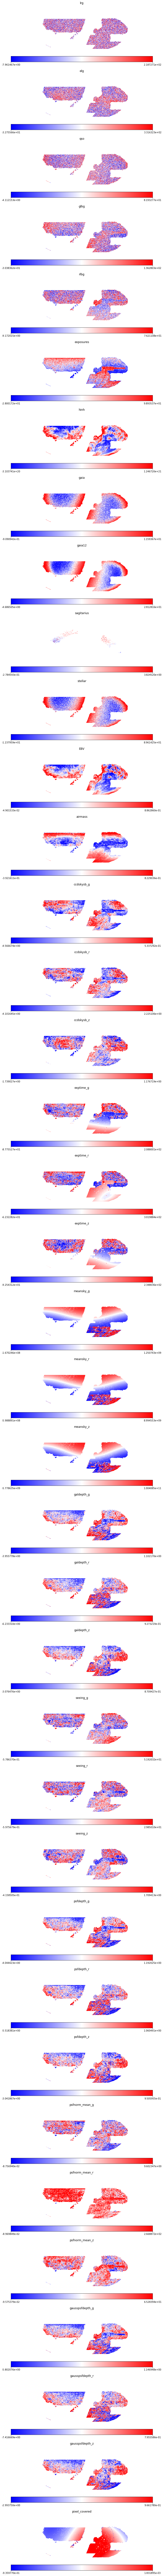

In [74]:
nrows = 38
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_south_comp.pixel_id.to_numpy()] = df_south_comp[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()


In [ ]:
nrows = 38
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(200,200))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = cols[i]

    m = np.zeros(NPIX)

    m[df_des.pixel_id.to_numpy()] = df_des[elem].to_numpy()
    mask = (m == 0)
    m[mask] = np.nan
    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1),format='%e', norm='hist', cmap="bwr", notext=False, rot=(120, 0, 0), badcolor='white',
            remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

### South


In [ ]:
col = list(df_south_comp.columns)
print(col)

In [ ]:
df_no_outlier = df_south_comp.drop(columns=['galdepth_g',
                                      'galdepth_r',
                                      'galdepth_z',
                                      'psfdepth_g',
                                      'psfdepth_r',
                                      'psfdepth_z',
                                      'psfnorm_mean_g',
                                      'psfnorm_mean_r',
                                      'psfnorm_mean_z',
                                      'gausspsfdepth_g',
                                      'gausspsfdepth_r',
                                      'gausspsfdepth_z',
                                      'RA',
                                      'DEC'])

col = list(df_no_outlier.columns)
print(col)

In [ ]:
factor = 7
print(len(df_no_outlier))
for elem in col:
    if elem == 'stellar':
        factor = 7
    df_no_outlier['Z'] = df_no_outlier[elem].transform(zscore)
    print("Element: ", elem, "| No of Elems with Z higher than factor  : ",
          len(df_no_outlier[(df_no_outlier['Z'] > factor)]))
    df_no_outlier = df_no_outlier[(df_no_outlier['Z'] < factor)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_south_comp)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_south_comp) - len(df_no_outlier)}")

col = list(df_no_outlier.columns)
col.remove('pixel_id')
col.remove('Z')
print(len(col))
df_noout = df_no_outlier
nrows = 20
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,150))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = col[i]
    df_noout['Z'] = df_no_outlier[elem].transform(zscore)

    df_outlier = df_noout[(df_noout['Z'] > 7)]

    m = np.zeros(NPIX)

    m[df_outlier.pixel_id.to_numpy()] = 1
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), min=-5, max=2, cbar=False, cmap="Reds", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

In [ ]:
#df_no_outlier = df_geo

#df_no_outlier.describe()
print(df_no_outlier.shape)
print(df_no_outlier.exposures.max())
print(df_no_outlier.exposures.mean())
print(df_no_outlier.exposures.median())

In [ ]:
print(len(df_no_outlier[df_no_outlier.exposures > 150]))
print(len(df_no_outlier[df_no_outlier.pixel_covered < 0.9]))
print(len(df_no_outlier[df_no_outlier.exposures < 7]))




plt.hist(df_no_outlier.exposures)

In [ ]:
df_no_outlier = df_no_outlier[df_no_outlier.exposures < 150]
df_no_outlier = df_no_outlier[df_no_outlier.pixel_covered > 0.9]
print(df_no_outlier.shape)

df_no_outlier.exposures.max()


df_no_outlier = df_no_outlier.drop(columns=['pixel_covered','Z'])

### Scaling the Data

In [ ]:
scaler = MinMaxScaler()
#scaler = RobustScaler()

df_scaled = df_no_outlier

cololo = list(df_scaled.columns)

print(cololo)
cololo.remove('pixel_id')

cololo.remove('lrg')
cololo.remove('elg')
cololo.remove('qso')
cololo.remove('glbg')
cololo.remove('rlbg')
"""
df_scaled['lrg'] = (df_scaled['lrg']/df_scaled.lrg.mean()) - 1
df_scaled['elg'] = (df_scaled['elg']/df_scaled.elg.mean()) - 1
df_scaled['qso'] = (df_scaled['qso']/df_scaled.qso.mean()) - 1

df_scaled.describe()
"""

df_scaled[cololo] = scaler.fit_transform(df_no_outlier[cololo])

df_scaled.describe()



In [ ]:
from desiutil.plots import plot_sky_binned

ra, dec = hp.pix2ang(NSIDE, df_scaled.pixel_id,lonlat=True)

ax = plot_sky_binned(ra,dec,data=df_scaled.lrg ,cmap='bwr',label='lrg', plot_type='grid', verbose=True,max_bin_area=0.5, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.elg ,cmap='bwr',label='elg', plot_type='grid', verbose=True,max_bin_area=0.5, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.qso ,cmap='bwr',label='qso', plot_type='grid', verbose=True,max_bin_area=0.5, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.glbg ,cmap='bwr',label='glbg', plot_type='grid', verbose=True,max_bin_area=0.5, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.rlbg ,cmap='bwr',label='rlbg', plot_type='grid', verbose=True,max_bin_area=0.5, clip_hi=1)


In [ ]:
df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=666, shuffle=True)

print(df_train.head())
print(df_test.head())
print(len(df_train))
print(len(df_test))


df_train.to_csv('../../bricks_data/south.csv', index=False)
df_test.to_csv('../../bricks_data/south_test.csv', index=False)



### DES

In [ ]:
col = list(df_des.columns)
print(col)

In [ ]:
df_no_outlier = df_des.drop(columns=['galdepth_g',
                                      'galdepth_r',
                                      'galdepth_z',
                                      'psfdepth_g',
                                      'psfdepth_r',
                                      'psfdepth_z',
                                      'psfnorm_mean_g',
                                      'psfnorm_mean_r',
                                      'psfnorm_mean_z',
                                      'gausspsfdepth_g',
                                      'gausspsfdepth_r',
                                      'gausspsfdepth_z',
                                      'RA',
                                      'DEC'])

col = list(df_no_outlier.columns)
print(col)

In [ ]:
factor = 7
print(len(df_no_outlier))
for elem in col:
    if elem == 'stellar':
        factor = 7
    df_no_outlier['Z'] = df_no_outlier[elem].transform(zscore)
    print("Element: ", elem, "| No of Elems with Z higher than factor  : ",
          len(df_no_outlier[(df_no_outlier['Z'] > factor)]))
    df_no_outlier = df_no_outlier[(df_no_outlier['Z'] < factor)]

print()
print(f"Galaxies Remaining before outlier removal: {len(df_des)}")
print(f"Galaxies Remaining after outlier removal: {len(df_no_outlier)}")
print(f"Elements cut by outlier removal: {len(df_des) - len(df_no_outlier)}")

col = list(df_no_outlier.columns)
col.remove('pixel_id')
col.remove('Z')
print(len(col))
df_noout = df_no_outlier
nrows = 20
ncols = 1
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(150,150))

#fig = plt.figure()
i = 0
for ax in ax.flatten():
    elem = col[i]
    df_noout['Z'] = df_no_outlier[elem].transform(zscore)

    df_outlier = df_noout[(df_noout['Z'] > 7)]

    m = np.zeros(NPIX)

    m[df_outlier.pixel_id.to_numpy()] = 1
    mask = (m == 0)
    m[mask] = np.nan

    plt.axes(ax)
    hp.mollview(m, title=elem, fig=fig, sub=(nrows, ncols, i + 1), min=-5, max=2, cbar=False, cmap="Reds", notext=False,
                rot=(120, 0, 0), badcolor='white',
                remove_dip=True, remove_mono=True, hold=True)
    #hp.graticule()
    i += 1

plt.show()

In [ ]:
#df_no_outlier = df_geo

#df_no_outlier.describe()
print(df_no_outlier.shape)
print(df_no_outlier.exposures.max())
print(df_no_outlier.exposures.mean())
print(df_no_outlier.exposures.median())
plt.hist(df_no_outlier.exposures)

In [ ]:
print(len(df_no_outlier[df_no_outlier.exposures > 350]))
print(len(df_no_outlier[df_no_outlier.pixel_covered < 0.9]))



plt.hist(df_no_outlier.exposures)

In [ ]:
df_no_outlier = df_no_outlier[df_no_outlier.exposures < 350]
df_no_outlier = df_no_outlier[df_no_outlier.pixel_covered > 0.9]
print(df_no_outlier.shape)

df_no_outlier.exposures.max()


df_no_outlier = df_no_outlier.drop(columns=['pixel_covered','Z'])

### Scaling the Data

In [ ]:
scaler = MinMaxScaler()
#scaler = RobustScaler()

df_scaled = df_no_outlier

cololo = list(df_scaled.columns)

print(cololo)
cololo.remove('pixel_id')

cololo.remove('lrg')
cololo.remove('elg')
cololo.remove('qso')
cololo.remove('glbg')
cololo.remove('rlbg')

"""
df_scaled['lrg'] = (df_scaled['lrg']/df_scaled.lrg.mean()) - 1
df_scaled['elg'] = (df_scaled['elg']/df_scaled.elg.mean()) - 1
df_scaled['qso'] = (df_scaled['qso']/df_scaled.qso.mean()) - 1

df_scaled.describe()"""


df_scaled[cololo] = scaler.fit_transform(df_no_outlier[cololo])

df_scaled.describe()



In [ ]:
from desiutil.plots import plot_sky_binned

ra, dec = hp.pix2ang(NSIDE, df_scaled.pixel_id,lonlat=True)

ax = plot_sky_binned(ra,dec,data=df_scaled.lrg ,cmap='bwr',label='lrg', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=-1, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.elg ,cmap='bwr',label='elg', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=-1, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.qso ,cmap='bwr',label='qso', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=-1, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.glbg ,cmap='bwr',label='glbg', plot_type='grid', verbose=True,max_bin_area=0.5, clip_hi=1)


In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.rlbg ,cmap='bwr',label='rlbg', plot_type='grid', verbose=True,max_bin_area=0.5, clip_hi=1)


In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.gaia12 ,cmap='bwr',label='gaia', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [ ]:
ax = plot_sky_binned(ra,dec,data=df_scaled.exposures ,cmap='bwr',label='exposures', plot_type='grid', verbose=True,max_bin_area=0.5,clip_lo=0, clip_hi=1)

In [ ]:
df_train, df_test = train_test_split(df_scaled, test_size=0.2, random_state=666, shuffle=True)

print(df_train.head())
print(df_test.head())
print(len(df_train))
print(len(df_test))


df_train.to_csv('../../bricks_data/des.csv', index=False)
df_test.to_csv('../../bricks_data/des_test.csv', index=False)



